# Изучение закономерностей, определяющих успешность игр
Для интернет-магазина компьютерных игр:
отработать принцип работы с данными для планирования бюджета рекламной компании на следующий год, выявить определяющие успешность игры закономерности

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
#df
#df.info()
#display(df['Year_of_Release'].value_counts())
display(df.isnull().sum())
#display(df.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В представленной таблице всего 16715 строк(наблюдений) и 11 столбцов. В следующих столбцах есть пропуски:'Name' - заполнены всего 16713 строк, 'Year_of_Release' - 16446, 'Genre' - 16713, 'Critic_Score' - 8137 (самый незаполненный столбец), 'User_Score' - 10014, 'Rating' - 9949.
В столбцах 'Name' и 'Genre' по всей видимости закономерные два пропуска.
В наименованиях столбцов пробелов не наблюдается, слова указаны через нижнее подчеркивание.
Необходимо наименования столбцов привести к нижнему регистру.
Тип столбца 'Year_of_Release' заменим на datetime.
Тип столбца 'Critic_Score' менять на int не будем.
Тип столбца 'User_Score' object заменим на float64, так как это оценка пользователей до 10 (т.е. число)
"Полных"/явных дубликатов не обнаружено. 

 

## Подготовка данных

In [2]:
#меняем названия столбцов
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

df.dropna(subset = ['year_of_release', 'name', 'genre' ], inplace = True)
#df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')
#df.info()

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В столбце 'user_score'обнаружили аббревиатуру 'tbd'. Значения столбца - оценка пользователей. Наименования игр-разные, платформы тоже разные, жанры-разные, годы разные, пропуски заменю на Nan.

In [3]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [4]:
import itertools # библиотека, для того чтобы сгенерить всевозможные комбинации platform и genre

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)  

df_2 = df.copy()

# генерю всевозможные комбинации
for platform_genre in itertools.product(df_2['platform'].unique(), df_2['genre'].unique()):
    
    platform = platform_genre[0]
    genre = platform_genre[1]
    
    # считаем две медианы
    u_median = df_2.loc[((df_2['platform'] == platform) & (df_2['genre'] == genre)), 'user_score'].median()
    c_median = df_2.loc[((df_2['platform'] == platform) & (df_2['genre'] == genre)), 'critic_score'].median()
    
    # и заменяем пропуски на найденные медианы
    df_2.loc[((df_2['platform'] == platform) & 
              (df_2['genre'] == genre) & 
              (df_2['user_score'].isna())), 'user_score'] = u_median
    
    df_2.loc[((df_2['platform'] == platform) & 
              (df_2['genre'] == genre) & 
              (df_2['critic_score'].isna())), 'critic_score'] = c_median

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       15333 non-null float64
user_score         15340 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

In [6]:
#display(df['name'].value_counts().head())
display(df.groupby('year_of_release')['name'].count().head())
df_2000 = df[df['year_of_release'] > 2000]
df_2000.head()
display(df_2000['platform'].value_counts().head())

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

DS      2120
PS2     2045
PS3     1306
Wii     1286
X360    1232
Name: platform, dtype: int64

In [7]:
display(df_2.sample(3))
display(df_2.sample(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1966,Resident Evil: The Darkside Chronicles,Wii,2009,Action,0.46,0.31,0.2,0.09,75.0,8.00,M,1.06
15727,Robopon 2: Cross Version,GBA,2001,Role-Playing,0.01,0.00,0.0,0.00,76.0,8.45,NaN,0.01
3398,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,0.55,0.03,0.0,0.01,NaN,NaN,NaN,0.59


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13681,Lise no Atelier: Ordre no Renkinjutsushi,DS,2007,Role-Playing,0.00,0.00,0.04,0.00,70.0,7.7,NaN,0.04
2859,Battlefield: Bad Company 2,PC,2010,Shooter,0.19,0.53,0.00,0.00,87.0,8.3,M,0.72
12782,Harry Potter and the Sorcerer's Stone,PC,2001,Action,0.01,0.04,0.00,0.01,65.0,7.8,E,0.06


In [8]:
display(df_2.sample(3, random_state = 8))
display(df_2.sample(3, random_state = 8))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11539,Shonen Jump's One Piece: Pirates Carnival,GC,2005,Misc,0.06,0.02,0.0,0.00,69.0,7.9,NaN,0.08
9751,Tom Clancy's Ghost Recon,Wii,2010,Shooter,0.10,0.01,0.0,0.01,46.0,6.8,T,0.12
10654,Pinball Hall of Fame: The Williams Collection,3DS,2011,Misc,0.09,0.00,0.0,0.01,67.0,7.3,E10+,0.10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11539,Shonen Jump's One Piece: Pirates Carnival,GC,2005,Misc,0.06,0.02,0.0,0.00,69.0,7.9,NaN,0.08
9751,Tom Clancy's Ghost Recon,Wii,2010,Shooter,0.10,0.01,0.0,0.01,46.0,6.8,T,0.12
10654,Pinball Hall of Fame: The Williams Collection,3DS,2011,Misc,0.09,0.00,0.0,0.01,67.0,7.3,E10+,0.10


Всего за весь период выпущено 11559 игр.

Думаю, что можно взять данные с 2000 года по 2016

platform
PS2     1194.39
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.81
PSP      289.53
3DS      257.81
XB       250.58
PC       201.06
GC       196.73
XOne     159.32
WiiU      82.19
PSV       53.81
PS        44.33
GB         9.24
N64        3.33
DC         1.42
WS         0.28
Name: total_sales, dtype: float64

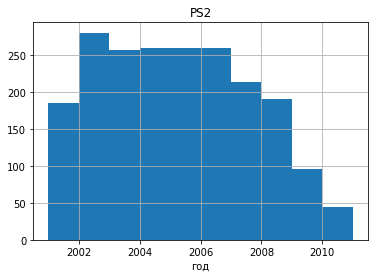

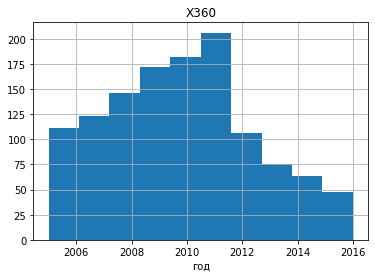

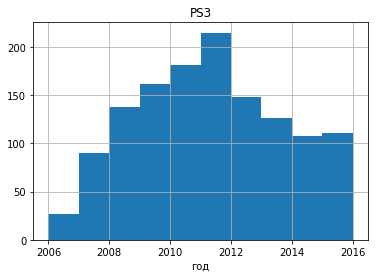

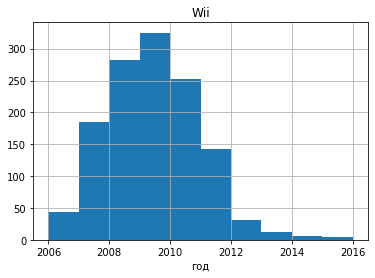

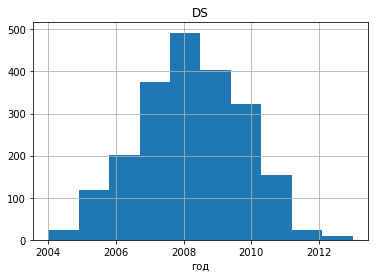

In [9]:
import matplotlib.pyplot as plt
display(df_2000.groupby('platform')['total_sales'].sum().sort_values(ascending = False))

PS2 = df_2000[df_2000['platform'] == 'PS2']    
PS2['year_of_release'].hist()
plt.title("PS2")
plt.xlabel("год")
plt.show()

X360 = df_2000[df_2000['platform'] == 'X360']    
X360['year_of_release'].hist()
plt.title("X360")
plt.xlabel("год")
plt.show()


PS3 = df_2000[df_2000['platform'] == 'PS3']    
PS3['year_of_release'].hist()
plt.title("PS3")
plt.xlabel("год")
plt.show()

Wii = df_2000[df_2000['platform'] == 'Wii']    
Wii['year_of_release'].hist()
plt.title("Wii")
plt.xlabel("год")
plt.show()

DS = df_2000[df_2000['platform'] == 'DS']    
DS['year_of_release'].hist()
plt.title("DS")
plt.xlabel("год")
plt.show()         

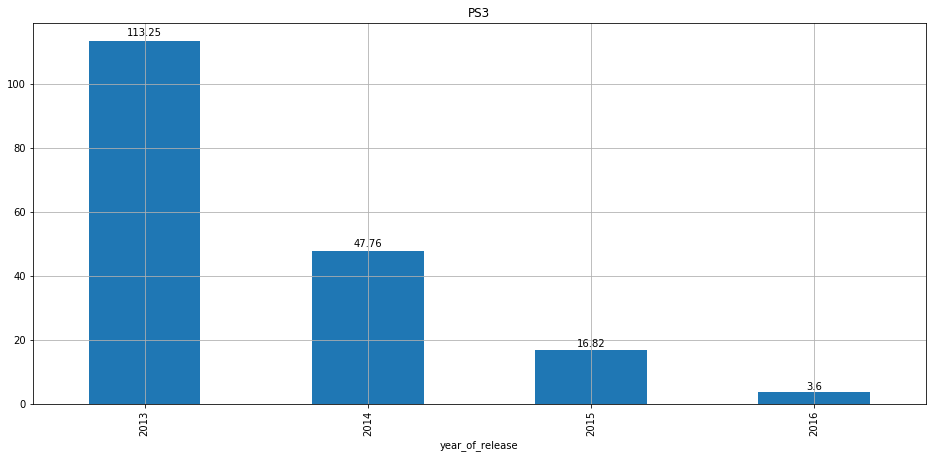

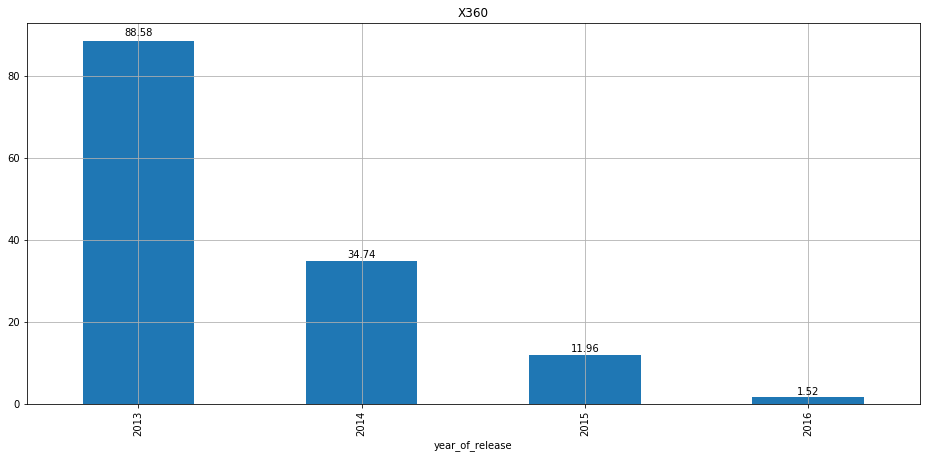

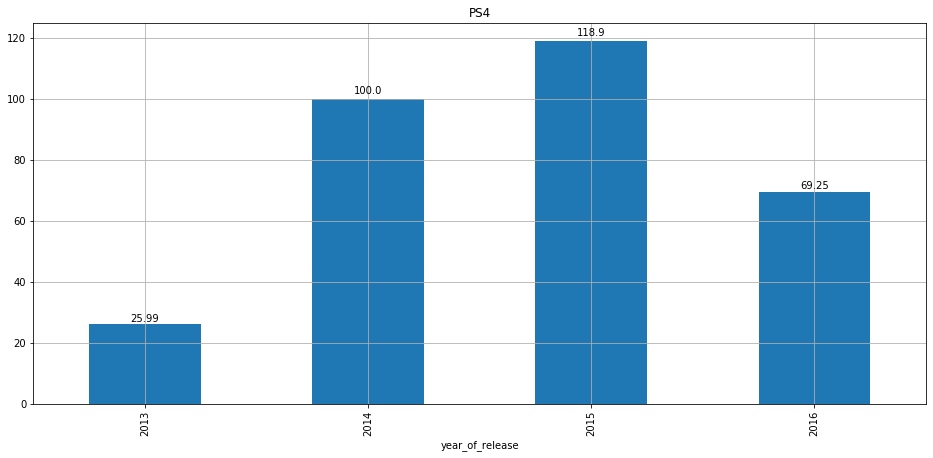

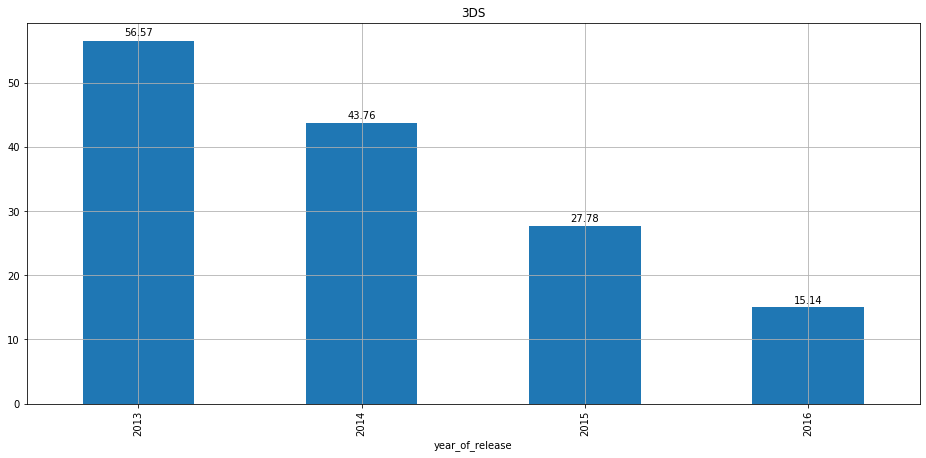

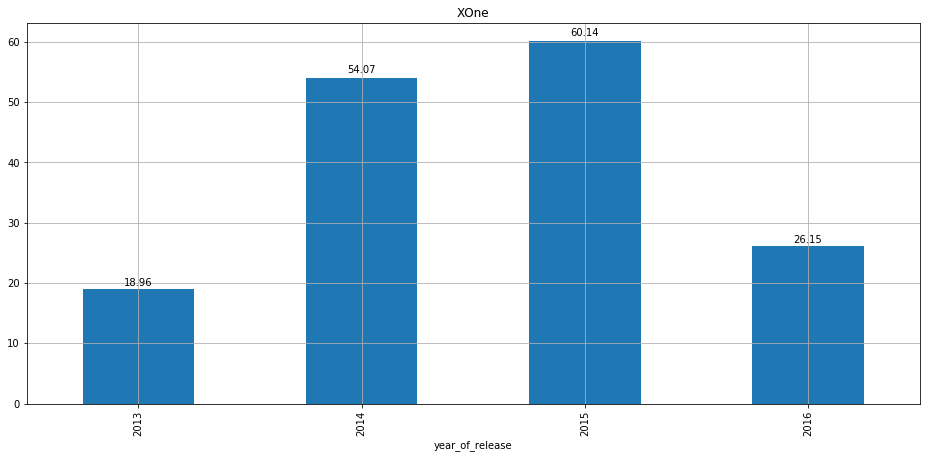

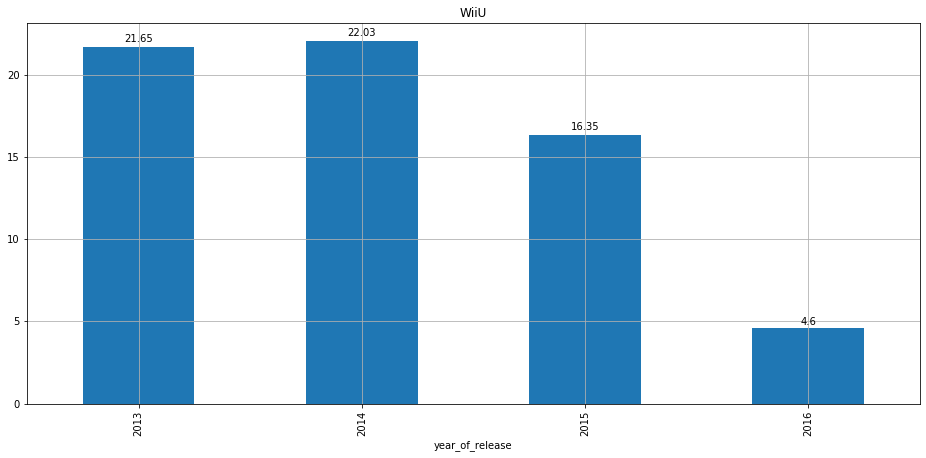

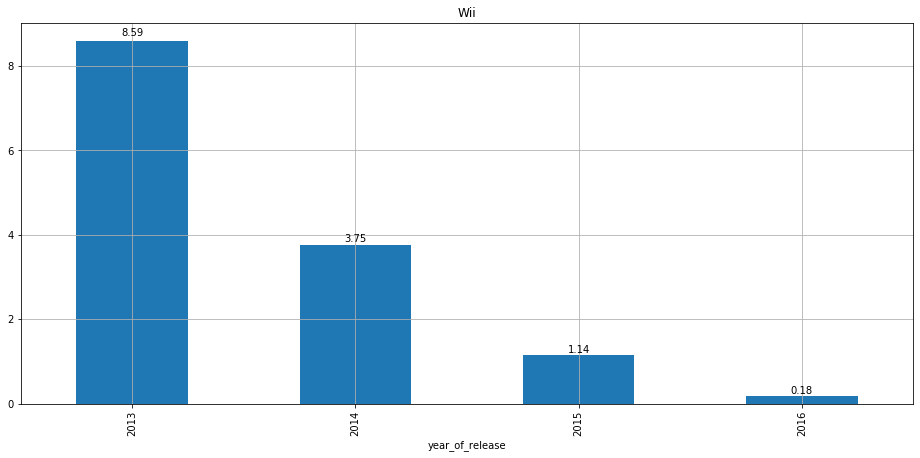

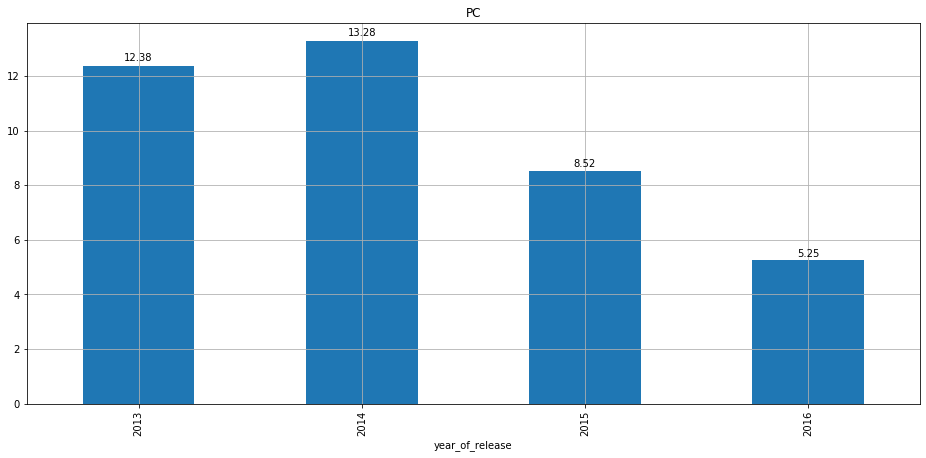

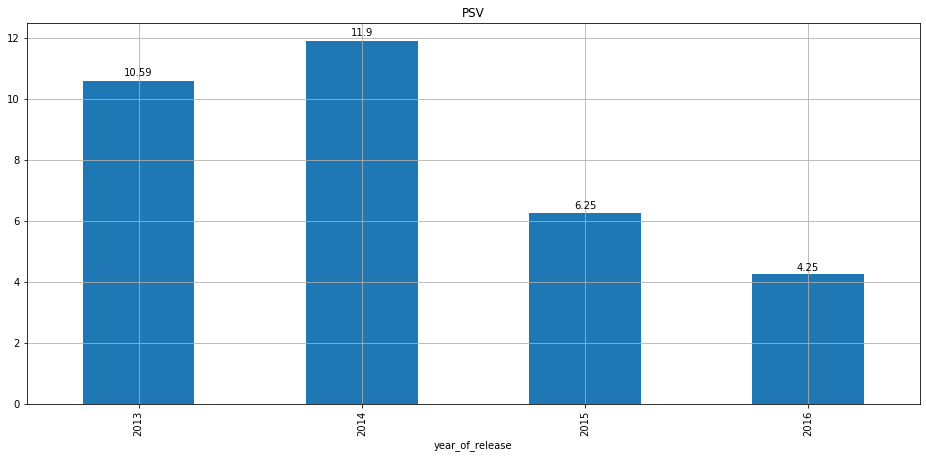

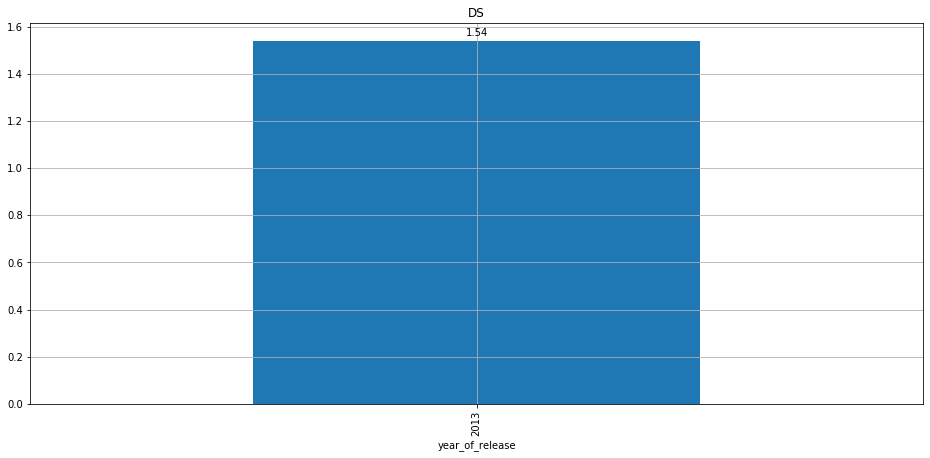

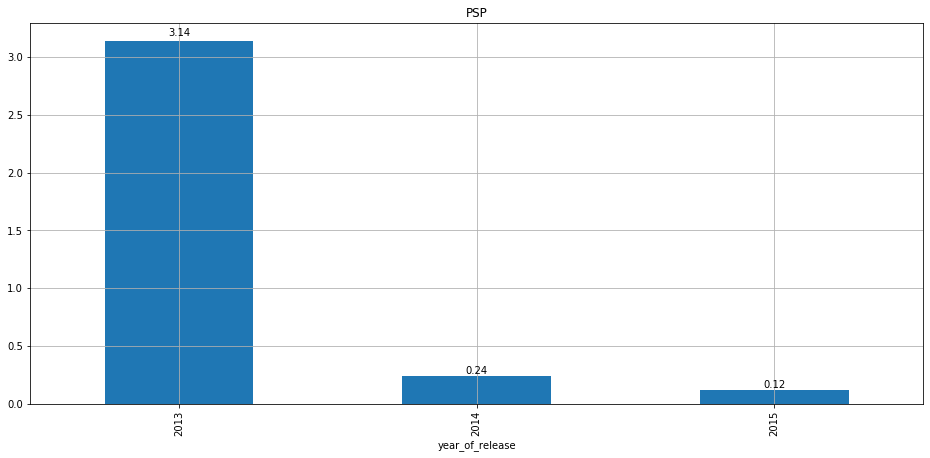

In [10]:
df_3 = df[df['year_of_release'] >= 2013]

for platform in df_3['platform'].unique():
    
    _ = df_3[df_3['platform'] == platform]
    _ = _.groupby('year_of_release')[['total_sales']].sum().reset_index()

    plot = _.plot(kind='bar', x='year_of_release', y='total_sales', legend=False, figsize=(16,7), grid=True, title=platform)
    
    for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.01*height, round(height, 2), ha='center', va='bottom')

    plt.show()

Делаем срез начиная с платформы DS по PS2:  

РS2: с 2001 по 2011, 10 лет  
ХЗ360: с 2005 по 2016, 11 лет  
PS3: с 2006 по 2016, 10 лет  
Wii: с 2006 по 2016, 10 лет  
DS: с 2004 по 2013, 9 лет  

Вывод: примерно за 10 лет, появляются новые и исчезают старые платформы  

Примем за актуальный период - срок 3 года, с 2013 по 2016 год.

In [11]:
df_3 = df[df['year_of_release'] >= 2013]
#df_3
display(df_3.groupby('platform')['total_sales'].sum().sort_values(ascending = False))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

   
Лидируют по продажам следующие платформы:  

PS4, XOne   ( PS3 - не буду брать, тот же производитель, что и PS4)

Минимальные продажи у следующих платформ: DC, PSP

Выбираем две прибыльные платформы: PS4, XOne

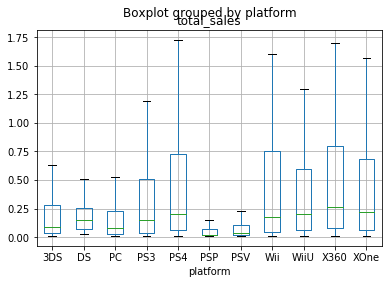

In [12]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

df_3.boxplot('total_sales', by='platform', showfliers=False);

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

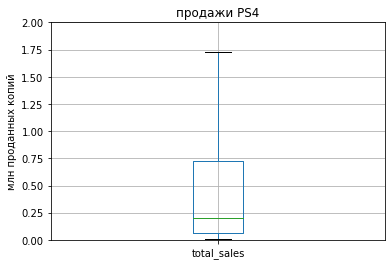

In [13]:
import matplotlib.pyplot as plt

df_3_PS4 = df_3[df_3['platform'] == 'PS4']     
df_3_PS4.boxplot(column='total_sales', showfliers=False)
plt.title("продажи PS4")
plt.ylabel("млн проданных копий")
plt.ylim(0, 2)

display(df_3_PS4.total_sales.describe())

PS4:  
нижний ус упирается в 0, верхний в 1.73   
Медиана - 0,20  
Среднее - 0,80  
Первый квартиль - 0,06  
Третий квартиль - 0,73  

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

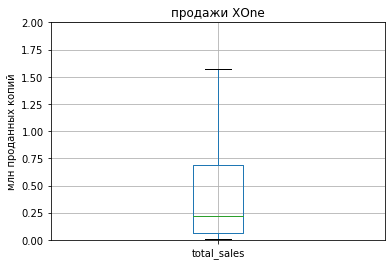

In [14]:
import matplotlib.pyplot as plt

df_3_XOne = df_3[df_3['platform'] == 'XOne']     
df_3_XOne.boxplot(column='total_sales', showfliers=False)
plt.title("продажи XOne")
plt.ylabel("млн проданных копий")
plt.ylim(0, 2)

display(df_3_XOne.total_sales.describe())

XOne:  
нижний ус упирается в 0, верхний в 1.58   
Медиана - 0,22  
Среднее - 0,64  
Первый квартиль - 0,06  
Третий квартиль - 0,74 

PS3:
нижний ус упирается в 0, верхний в 1.7. Все что выше считается выбросом.
Медиана - 0,28
Среднее - 0,71
Первый квартиль - 0,11
Третий квартиль - 0,76

Wii:
нижний ус упирается в 0, верхний в 1.1. Все что выше считается выбросом.
Медиана - 0,19
Среднее - 0,69
Первый квартиль - 0,09
Третий квартиль - 0,49

Для каждой платформы строим диаграмму рассеивания и расчитываем корелляцию между отзывами и продажами

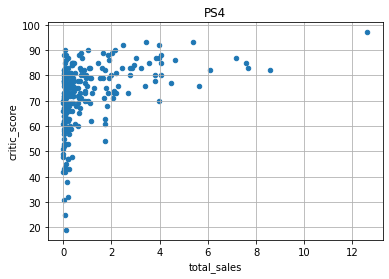

0.406567902061781

-0.031957110204556424

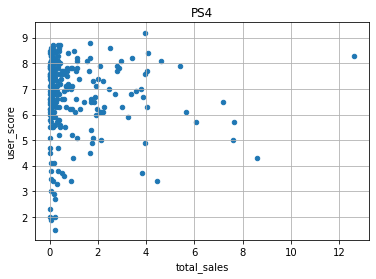

In [15]:
df_3_PS4.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title("PS4")
plt.show()
df_3_PS4.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title("PS4")

display((df_3_PS4['total_sales']).corr(df_3_PS4['critic_score']))
display((df_3_PS4['total_sales']).corr(df_3_PS4['user_score']))

X360: 
видно, что когда плохо идут продажи - количество оценок критиков много, чем больше продажи, тем меньше оценок критиков.
Аналогичная ситуация с оценками пользователей.
Однако рассчет корреляций, говорит о наличии взаимосвязей, но не сильных между продажами и оцеками критиков и 
слабых между продажами и оцеками пользователей

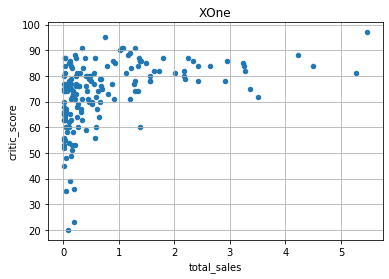

0.41699832800840175

-0.06892505328279412

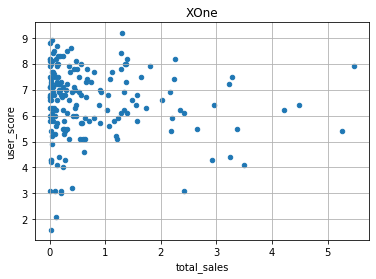

In [16]:
df_3_XOne.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title("XOne")
plt.show()
df_3_XOne.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title("XOne")

display((df_3_XOne['total_sales']).corr(df_3_XOne['critic_score']))
display((df_3_XOne['total_sales']).corr(df_3_XOne['user_score']))

PS3(примерно аналогичнеая ситуация по отношению к X360): 
видно, что когда плохо идут продажи - количество оценок критиков много, чем больше продажи, тем меньше оценок критиков.
Аналогичная ситуация с оценками пользователей.
Однако рассчет корреляций, говорит о наличии взаимосвязей, но не сильных между продажами и оцеками критиков и 
слабых между продажами и оцеками пользователей

Wii - плотность графиков значительно меньше чем плотность графиков X360 и PS3.
Характер разброса точек примерно аналогичен по отношению к X360 и PS): 
видно, что когда плохо идут продажи - количество оценок критиков много, чем больше продажи, тем меньше оценок критиков.
Аналогичная ситуация с оценками пользователей.
Однако рассчет корреляций, говорит о наличии слабых взаимосвязей между продажами и оцеками критиков и 
между продажами и оцеками пользователей, соответственно.

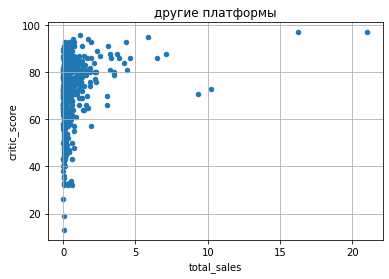

0.253188810821927

0.009361886469724199

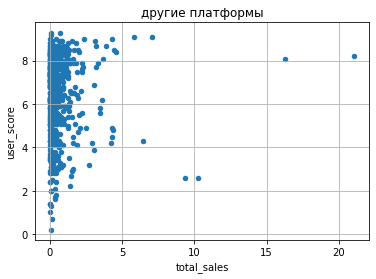

In [17]:
df_3_other = df_3[(df_3['platform'] != 'XOne') & (df_3['platform'] != 'PS4')]
#df_3_other
df_3_other.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title("другие платформы")
plt.show()
df_3_other.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title("другие платформы")

display((df_3_other['total_sales']).corr(df_3_other['critic_score']))
display((df_3_other['total_sales']).corr(df_3_other['user_score']))

Другие платформы - плотность графиков значительно выше чем плотность графиков рассматриваемых выше платформ  
Характер разброса точек примерно аналогичен:   
видно, что когда плохо идут продажи - количество оценок критиков много, чем больше продажи, тем меньше оценок критиков.  
Аналогичная ситуация с оценками пользователей.  
Рассчет корреляций, говорит о наличии слабых взаимосвязей между продажами и оцеками критиков и   
между продажами и оцеками пользователей, соответственно.  

In [18]:
display(df_3.groupby('genre')['total_sales'].sum().sort_values(ascending = False))

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

   
    Самые прибыльные жанры: Action и Shooter.  
        Наименее прибыльные: Strategy и Puzzle

## Портрет пользователя каждого региона

In [19]:
display('продажи в Северной Америке по платформам')
display(df_3.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Европе по платформам')
display(df_3.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Японии по платформам')
display(df_3.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head())

'продажи в Северной Америке по платформам'

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

'продажи в Европе по платформам'

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

'продажи в Японии по платформам'

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

В Северной Америке лидирует по продажам платформа PS4, не намного отстает XOne, тройку лидеров замыкает X360    
В Европе первое место - PS4, второе - PS3, тройку лидеров замыкает XOne   
В Японии лидируют платформы отечественного производителя, конечно же, возглавляет список 3DS  

In [20]:
display('продажи в Северной Америке по жанрам')
display(df_3.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Европе по жанрам')
display(df_3.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Японии по жанрам')
display(df_3.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head())

'продажи в Северной Америке по жанрам'

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

'продажи в Европе по жанрам'

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

'продажи в Японии по жанрам'

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

если одни платформы могут быть не популярны в Японии, например XOne или X360, то что касается жанров, ситуация иная. Например жанр Action, популярен как в Северной Америке, так и в Европе, так и в Японии.  
Жанр Shooter на втором месте в Северной Америке и в Европе, а вот в Японии на первом месте Role-Playing

In [21]:
df_3['rating'] = df_3['rating'].fillna('rat')
#display(df_2000[df_2000['rating'] == 'rat'])
rat = df_3[df_3['rating'] == 'rat']
display(rat['genre'].value_counts())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Action          347
Adventure       185
Role-Playing    154
Misc             91
Sports           46
Fighting         32
Simulation       31
Strategy         31
Shooter          26
Racing           18
Platform          9
Puzzle            7
Name: genre, dtype: int64

In [22]:
display('продажи в Северной Америке по рейтингу ESRB')
display(df_3.groupby('rating')['na_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Европе по рейтингу ESRB')
display(df_3.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).head())
display()
display('продажи в Японии по рейтингу ESRB')
display(df_3.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).head())

'продажи в Северной Америке по рейтингу ESRB'

rating
M       165.21
rat      89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

'продажи в Европе по рейтингу ESRB'

rating
M       145.32
E        83.36
rat      78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

'продажи в Японии по рейтингу ESRB'

rating
rat     85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

По рейтингу ESRB в Северной Америке и Европе лидирует - M, т.е. «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

## Проверка гипотез

нулевая гипотеза H₀: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

альтернативная гипотеза H₁: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"

In [23]:
from scipy import stats as st
import pandas as pd

df_3.dropna(subset = ['platform', 'user_score'], inplace = True)  #удаляем пропуски
df_3.loc[df_3['user_score'] == 'tbd', 'user_score'] = 0  #заменяем tbd на 0
df_3['user_score'] = df_3['user_score'].astype('float')     #меняем тип на float иначе код не сработает
#display(df['platform'].value_counts())
xone = df_3[df_3['platform'] == 'XOne']
#xone
pc = df_3[df_3['platform'] == 'PC']
#pc

alpha = 0.05
results = st.ttest_ind(xone['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: Settin

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Рассчитываем дисперсию для пользовательских рейтингов платформы Xbox

In [24]:
import numpy as np

variance_xone = np.var(xone, ddof=1)
variance_xone

year_of_release      0.979054
na_sales             0.385215
eu_sales             0.142408
jp_sales             0.000032
other_sales          0.008560
critic_score       165.993570
user_score           1.906997
total_sales          1.036450
dtype: float64

Рассчитываем дисперсию для пользовательских рейтингов платформы PC

In [25]:
variance_pc = np.var(pc, ddof=1)
variance_pc

year_of_release      1.250272
na_sales             0.018443
eu_sales             0.046247
jp_sales             0.000000
other_sales          0.001025
critic_score       110.799182
user_score           3.035893
total_sales          0.135352
dtype: float64

Рассчитываем стандартное отклонение для пользовательских рейтингов платформы Xbox

In [26]:
standard_xone = np.std(xone, ddof=1)
standard_xone

year_of_release     0.989472
na_sales            0.620657
eu_sales            0.377369
jp_sales            0.005679
other_sales         0.092520
critic_score       12.883849
user_score          1.380941
total_sales         1.018062
dtype: float64

Рассчитываем стандартное отклонение для пользовательских рейтингов платформы PC

In [27]:
standard_pc = np.std(pc, ddof=1)
standard_pc

year_of_release     1.118156
na_sales            0.135803
eu_sales            0.215051
jp_sales            0.000000
other_sales         0.032012
critic_score       10.526119
user_score          1.742381
total_sales         0.367903
dtype: float64

нулевая гипотеза H₀: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

альтернативная гипотеза H₁: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [28]:
#df.dropna(subset = ['genre', 'user_score'], inplace = True)  #удаляем пропуски

action = df_3[df_3['genre'] == 'Action']
#action
sports = df_3[df_3['genre'] == 'Sports']
#sports
alpha = 0.05
results_2 = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

Актуальность той или иной платформы сохраняется в течении 10 лет    
      
В Северной Америке лидирует по продажам платформа PS4, не намного отстает XOne, тройку лидеров замыкает X360      
В Европе первое место - PS4, второе - PS3, тройку лидеров замыкает XOne     
В Японии лидируют платформы отечественного производителя, конечно же, возглавляет список 3DS    
  
Самые прибыльные жанры: Action и Shooter     
Наименее прибыльные: Strategy и Puzzle    
      
По рейтингу ESRB в Северной Америке и Европе лидирует - M, т.е. «Для взрослых»    
  
Резюме:     
стоит делать ставку на рекламу игр таких платформ как PS4, XOne с жанром Action и Shooters,    
по рейтингу ESRB - M, в таких регионах как Северная Америка и Европа.    
В японии - стоит делать ставку на рекламу игр платформ отечественного производителя с жанром Role-Playing и Action  